In [17]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [18]:
%matplotlib notebook

In [19]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [20]:
from PyChop import PyChop2

In [26]:
instrument = PyChop2('/SNS/users/lj7/dv/PyChop/SNS/arcs-v3.yaml', 'ARCS-100-1.5-SMI', 600)

In [27]:
instrument.ei = 130

In [28]:
print "Flux = " + str(instrument.getFlux()[0]) + ' n/cm^2/s'
print
print "EN(meV)  FWHM(meV)"
en = np.arange(-50, 120, 10)
res = instrument.getResolution(en)
for (x,y) in zip(en, res):
    print "%0.2f     %0.3f" % (x, y)

Flux = 8771.00155856 n/cm^2/s

EN(meV)  FWHM(meV)
-50.00     7.833
-40.00     7.402
-30.00     6.984
-20.00     6.580
-10.00     6.190
0.00     5.816
10.00     5.457
20.00     5.114
30.00     4.789
40.00     4.482
50.00     4.194
60.00     3.927
70.00     3.682
80.00     3.460
90.00     3.263
100.00     3.093
110.00     2.954


<IPython.core.display.Javascript object>


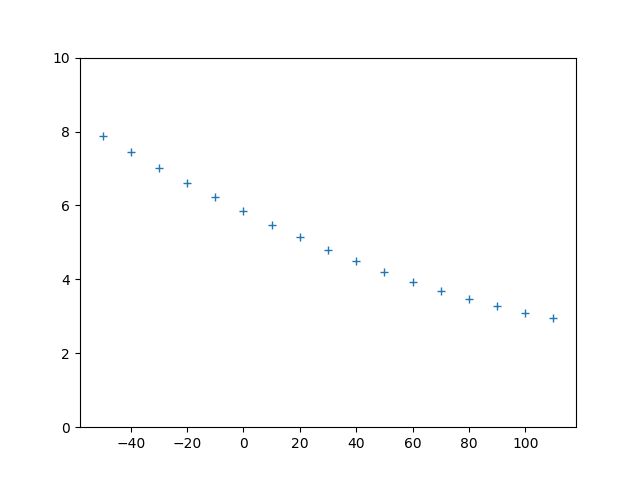

(0, 10)

In [24]:
plt.figure()
plt.plot(en, res, '+')
plt.ylim(0, 10)

# Compare to mcvine

In [9]:
sys.path.insert(0, "/SNS/users/lj7/dv/srins/graphite-DOS/notebooks/")

In [10]:
import res_params_interped_funcs_Ei_130 as rpif

In [11]:
from dgsres import icg
geom = icg.Geom(l1=11.6, l2=2.0, l3=3.)

In [12]:
def res_func(Eaxis, E0, interped_funcs, Ei, geom):
    "return resolution function y array for the given x axis (Eaxis). E is the energy transfer"
    params = dict()
    for name in interped_funcs.keys():
        value = interped_funcs[name](E0)
        params[name] = value
    y = icg.resolution(Eaxis, Ei=130., E0=E0, geom=geom, **params)
    y/=y.sum()
    return y

In [13]:
Eaxis = np.arange(-30, 20, 0.01)

<IPython.core.display.Javascript object>


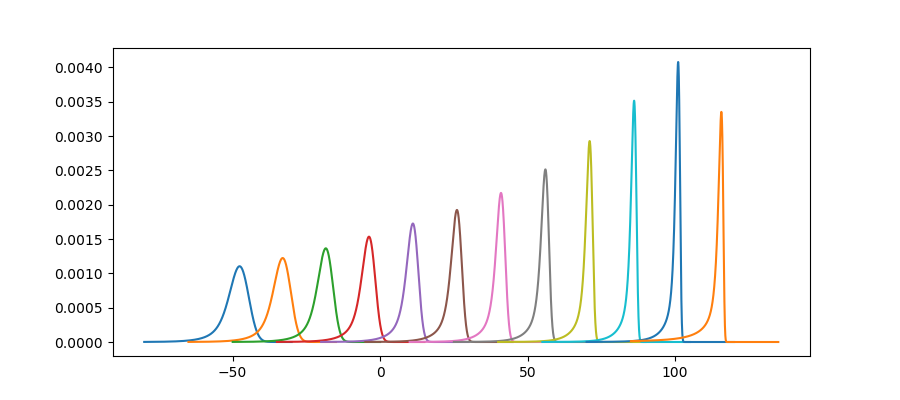

/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:31: RuntimeWarning: invalid value encountered in sqrt
  t = -l3/vf + l3/np.sqrt(vi**2-SE2V**2*E)
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:52: RuntimeWarning: invalid value encountered in multiply
  C0_a = sqp/sq2*T1*T2_a*erfc(vmin_a)
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:53: RuntimeWarning: invalid value encountered in multiply
  C1_a = T1**2 * T2_a * (np.exp(-vmin_a*vmin_a) - sqp*vmin_a * erfc(vmin_a))
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:54: RuntimeWarning: invalid value encountered in multiply
  C2_a = sq2 * T1**3 * T2_a * (sqp*(1./2+vmin_a**2)*erfc(vmin_a)-vmin_a*np.exp(-vmin_a**2))


In [14]:
plt.figure(figsize=(9, 4))
for E0 in np.arange(-50., 120., 15.):
    x = Eaxis + E0
    y = res_func(x, E0, rpif.interped_funcs, Ei=130, geom=geom)
    plt.plot(x, y) #, '+-')
plt.show()

<IPython.core.display.Javascript object>


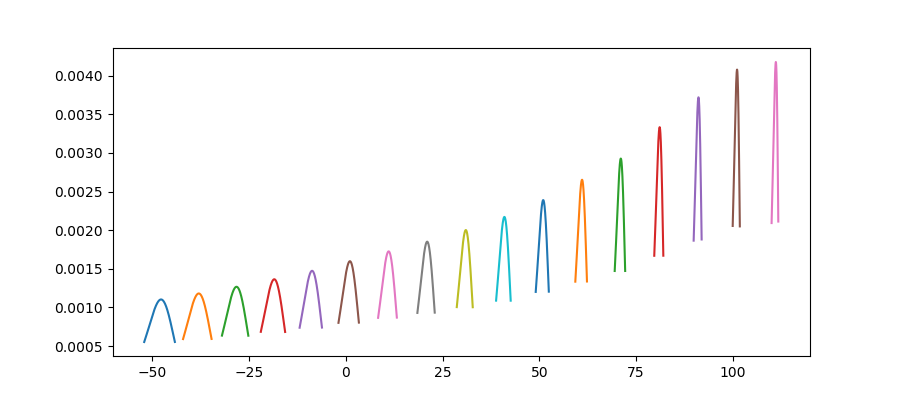

In [15]:
Etransfers = np.arange(-50., 120., 10.)
FWHMs = []
plt.figure(figsize=(9, 4))
for E0 in Etransfers:
    x = Eaxis + E0
    y = res_func(x, E0, rpif.interped_funcs, Ei=130, geom=geom)
    maxy = np.max(y)
    hm = maxy/2
    x1, y1 = x[y>hm], y[y>hm]
    plt.plot(x1, y1)
    FWHMs.append( x1[-1]-x1[0] )
plt.show()

<IPython.core.display.Javascript object>


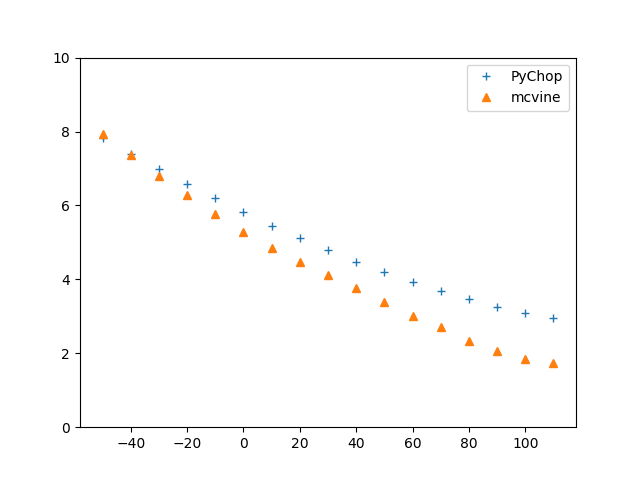

(0, 10)

In [29]:
plt.figure()
plt.plot(en, res, '+', label='PyChop')
plt.plot(Etransfers, FWHMs, '^', label='mcvine')
plt.legend()
plt.ylim(0, 10)

In [24]:
FWHMs = np.array(FWHMs)
res = np.array(res)

<IPython.core.display.Javascript object>


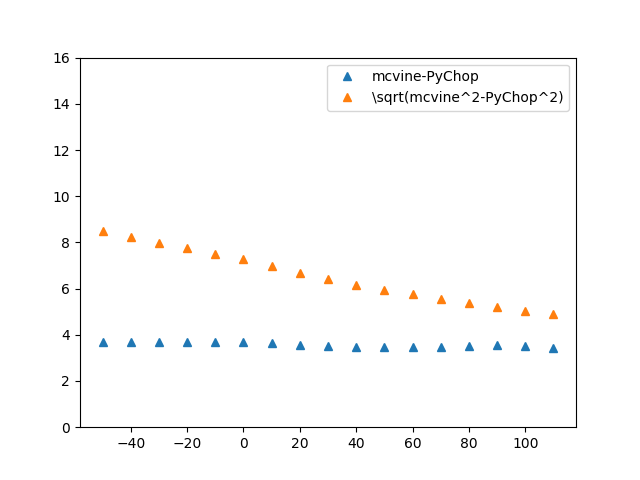

(0, 16)

In [29]:
plt.figure()
plt.plot(Etransfers, res-FWHMs, '^', label='mcvine-PyChop')
plt.plot(Etransfers, np.sqrt(res*res-FWHMs*FWHMs), '^', label='\sqrt(mcvine^2-PyChop^2)')
plt.legend()
plt.ylim(0, 16)

# Exp data

In [67]:
import histogram.hdf as hh

In [68]:
iqe = hh.load('/SNS/users/lj7/simulations/ARCS/graphite/getdos-non-Rad-130meV/iqe-interped.h5')

/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


In [69]:
I = iqe.I
I[I!=I]=0

In [70]:
ie = iqe.sum('Q')

<IPython.core.display.Javascript object>


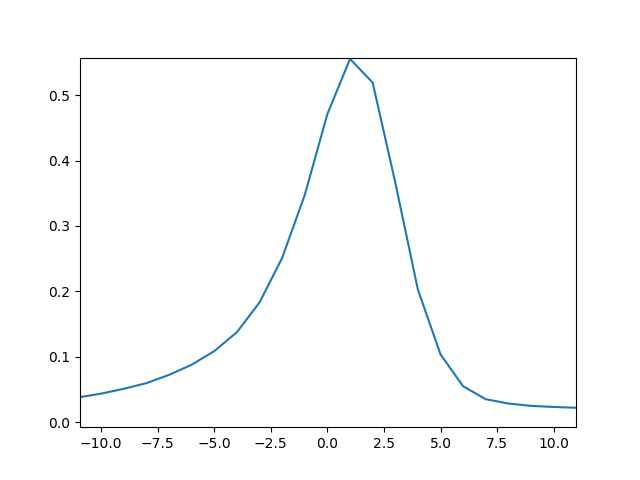

In [71]:
plt.figure()
plt.plot(ie.E, ie.I)

In [75]:
x = np.arange(-15., 10., 0.1)
y = np.interp(x, ie.E, ie.I)

<IPython.core.display.Javascript object>


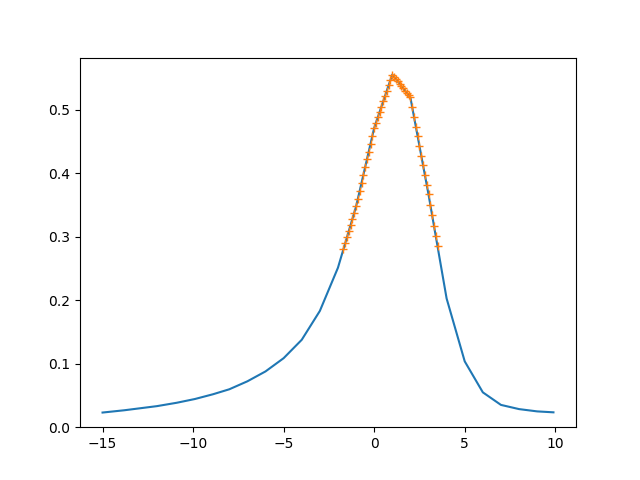

5.2


In [79]:
plt.figure()
upper = y > np.max(y)/2
plt.plot(x,y)
plt.plot(x[upper], y[upper], '+')
plt.ylim(0, None)
x1 = x[upper]
print x1[-1]-x1[0]